<a href="https://colab.research.google.com/github/dikshap07/ML-Algorithms/blob/master/Predicting_Celsius_using_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
 
import numpy as np

###setting up training data 

In [2]:
celsius_g = np.array([-40, -10,0,0,15,22,38],dtype = float)
fahrenhait_a = np.array([-40,14,32,46,59,72,100],dtype = float)

for i,c in enumerate(celsius_g):
  print("{} in degree Celsius = {} degree Fahrenhait".format(c, fahrenhait_a[i]))

-40.0 in degree Celsius = -40.0 degree Fahrenhait
-10.0 in degree Celsius = 14.0 degree Fahrenhait
0.0 in degree Celsius = 32.0 degree Fahrenhait
0.0 in degree Celsius = 46.0 degree Fahrenhait
15.0 in degree Celsius = 59.0 degree Fahrenhait
22.0 in degree Celsius = 72.0 degree Fahrenhait
38.0 in degree Celsius = 100.0 degree Fahrenhait


##Creating the Model


###Building a layer

In [3]:
#we are only creating one dense layer
layer0 = tf.keras.layers.Dense(units=1, input_shape = [1] )   #input_shape = 1:specifiers that input to this layer is a single value(1-D aaray with 1 memeber) these are the celsius degrees coming in 
                                                              #units specify the number of internal variables in layer or neurons (internal variables are to be learmt by the layer to solve the problem)

###Assembling layers into the model

In [4]:
model = tf.keras.Sequential([layer0])
#or
#model = tf.keras.Sequential([tf.keras.layers.Dense(units=1, input_shape = [1] ) ])

###Compiling teh model with Loss function and Optimizer function

In [6]:
model.compile(loss = 'mean_squared_error',
              optimizer = tf.keras.optimizers.Adam(0.1))  #using Adams's optimizer and 0.1 learning rate(can be btw 0.1- 0.001)

###Train the model

In [11]:
history = model.fit(celsius_g,fahrenhait_a,epochs = 500,verbose = False) #verbose: controls how much output the method produces
print("Finished training the model")

Finished training the model


###Displaying training stats


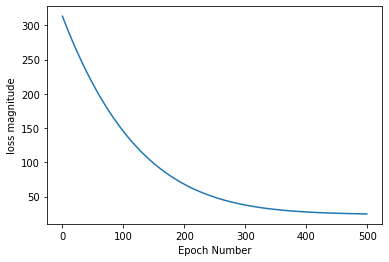

In [17]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel('loss magnitude')
plt.plot(history.history['loss'])

###Using model to predict values

In [18]:
print(model.predict([100.0]))

[[212.24088]]


###Looking at layer weights

In [19]:
print("These are the layer variables : {}".format(layer0.get_weights()))

These are the layer variables : [array([[1.7910528]], dtype=float32), array([33.135586], dtype=float32)]


#Trying with 3 layers

In [24]:
layer1 = tf.keras.layers.Dense(units = 4, input_shape = [1])
layer2 = tf.keras.layers.Dense(units = 4, input_shape = [1])
layer3 = tf.keras.layers.Dense(units = 1, input_shape= [1])

model_l = tf.keras.Sequential([layer1,layer2,layer3])

model_l.compile(loss = 'mean_squared_error',optimizer = tf.keras.optimizers.Adam(0.1))
history_l = model_l.fit(celsius_g,fahrenhait_a,epochs = 500,verbose = False) #verbose: controls how much output the method produces
print("Finished training layered model")

print(model_l.predict([100.0]))
print("Model predicts that 100 degrees Celsius is: {} degrees Fahrenheit".format(model_l.predict([100.0])))
print("These are the l0 variables: {}".format(layer1.get_weights()))
print("These are the l1 variables: {}".format(layer2.get_weights()))
print("These are the l2 variables: {}".format(layer3.get_weights()))

Finished training layered model
[[212.55495]]
Model predicts that 100 degrees Celsius is: [[212.55495]] degrees Fahrenheit
These are the l0 variables: [array([[ 0.06087496,  0.03200314, -0.7706542 , -0.23801383]],
      dtype=float32), array([-1.6209615, -2.7074456, -2.9773312, -2.8854752], dtype=float32)]
These are the l1 variables: [array([[ 0.9031543 , -0.50469375,  0.01968811, -0.58759475],
       [ 0.53594977, -1.3862189 ,  1.3888621 , -0.300544  ],
       [-0.2239405 , -0.86770165,  0.99902034, -0.5331422 ],
       [ 0.3615354 , -0.6905006 ,  0.9359135 ,  0.19655176]],
      dtype=float32), array([-0.81500024,  3.0218449 , -3.0441163 ,  2.8141568 ], dtype=float32)]
These are the l2 variables: [array([[-0.60439646],
       [ 0.97767186],
       [-0.80346024],
       [ 1.1891669 ]], dtype=float32), array([2.9621055], dtype=float32)]
